Текст и информация в документе может быть выделены цветом.
 - <span style="background-color:lightgreen">зеленым</span> выделены вопросы, которые обязательны для изучения (на троечку);
 - <span style="background-color:orange">оранжевым</span> выделены вопросы повышенной сложности, интересные нюансы (на четверочку);
 - <span style="background-color:LIGHTCORAL">красным</span> выделены сложные вопросы, рекомендуемые для самостоятельного изучения (на пятерочку).

### <span style="background-color:lightgreen">Численные методы интегрирования ОДУ</span>

Рассмотрим методы численного интегрирования обыкновенных дифференциальных уравнений (ОДУ) вида

$$y^{(n)}(t)=f(t,y(t),y'(t),...,y^{(n-1)}(t))$$

с заданными начальными условиями $y(0) = y_0$ (т.н. задача Коши). Функции $y$ и $f$ могут быть
заданы векторами

![](pics/Screenshot_3.png)


приводя к системе ОДУ

$$\mathbf{y}^{(n)}(t)=\mathbf{f}(t,\mathbf{y}(t),\mathbf{y}'(t),...,\mathbf{y}^{(n-1)}(t))$$


Для дальнейшего рассмотрения существенным является факт, что любое ОДУ произвольной
степени может быть сведено к эквивалентной системе ОДУ первого порядка. Например, мы
можем преобразовать систему ОДУ, состоящую из 3-х ОДУ второго порядка, к системе 6-ти
ОДУ первого порядка

Например:
$$s'+s''=f(s)$$
Вводится новая переменная 
$$s'=y,$$
$$y'=f(s)-y$$
Вводя вектор $\mathbf{u}(t)=(s(t), y(t))$ $$\mathbf{u'}=g(\mathbf{u})$$


<span style="background-color:lightgreen">Задача Коши</span> — одна из основных задач теории дифференциальных уравнений (обыкновенных и с частными производными); состоит в нахождении решения (интеграла) дифференциального уравнения, удовлетворяющего так называемым начальным условиям (начальным данным).

#### <span style="background-color:lightgreen">Метод Эйлера</span>

Рассмотрим численное решение задачи Коши
$$y'(t)=f(t,y(t)),  y(t_0)=y_0$$
для последовательности точек $t_0, t_1, t_2, ... ,$ которые будем считать для простоты расположенными эквидистантно с шагом $h$, так что
$$t_n = t_0 + hn$$
Предположим также, что $y(t)$ является гладкой функцией и может быть разложена в ряд Тейлора:
$$y(t_{n+1}) = y(t_n) + hy'(t_n) + \frac{h^2}{2} y''(t_n)+...$$


Если мы оборвем ряд Тейлора после второго члена разложения, мы получим т.н. явный метод Эйлера, который записывается в виде:
$$y_{n+1} = y_n + hy_n = y_n + hf(t_n, y_n)$$
неявный метод Эйлера:
$$y_{n+1} = y_n + hy_n = y_n + hf(t_{n+1}, y_{n+1})$$

#### <span style="background-color:orange">Точность и устойчивость численного решения</span>
Начнем с оценки *локальной* ошибки метода. Для этого разложим функцию $z(t)$ в ряд Тейлора в точке $t_{n−1}$ и оценим ее значение в точке $t_n$:

![](pics/Screenshot_2.png)

Вычитая из этого разложения
$$y_{n} = y_{n-1} + hf(t_{n-1}, y_{n-1})$$

получаем оценку для локальной ошибки

$$e_n = z(t_n) − y_n = \frac{h^2}{2}z''(t_{n-1})+...=O(h^2)$$

Теперь оценим грубо *глобальную* ошибку метода. Будем считать, что глобальная ошибка
метода в точке $t$ есть сумма всех локальных ошибок вплоть до этой точки. Для достижения точки
$t$ требуется сделать $(t − t_0)/h$ шагов и на каждом шаге локальная ошибка есть $O(h^2)$, так что
оценка глобальной ошибки есть просто $O(h)$. Это, конечно-же не математическое доказательство, однако такая оценка оправдана.
Обычно говорят, что метод численного интегрирования ОДУ является методом порядка $p$, если
 - локальная ошибка = $O(h^{p+1})$
 - глобальная ошибка = $O(h^p)$.

#### <span style="background-color:lightgreen">Улучшенный метод Эйлера</span>

$$y(t_{n+1}) = y(t_n) + hy'(t_n) + \frac{h^2}{2} y''(t_n)+O(h^3)$$
$$y(t_{n+1}) = y_n + hf(t_n, y_n) + \frac{h^2}{2} \frac{df(t_n, y_n)}{dt}+O(h^3)$$
$$\frac{df(t_n, y_n)}{dt}=f'_n=\frac{f(t_{n+1}, y_{n+1})-f(t_n,y_n)}{h}+O(h)$$
$$\frac{df(t_n, y_n)}{dt}=f'_n=\frac{f(t_n,y_n)-f(t_{n-1}, y_{n-1})}{h}+O(h)$$
Итого, улучшенный метод Эйлера (метод Эйлера–Коши, *mid point method*):
$$y_{n+1}=y_n+hf(t_n+\frac{h}{2}, y_n+\frac{h}{2}f(t_n, y_n))$$

#### <span style="background-color:lightgreen">Методы Рунге–Кутты</span>

Методы Рунге–Кутты (РК) были разработаны в попытке получить такую же точность как и в
методах, использующих разложение в ряд Тейлора, но без вычисления всех необходимых производных. Как и в улучшенном методе Эйлера, это достигается за счет включения дополнительных
точек между узлами расчетной сетки $t_n$ и $t_{n+1}$. Метод РК m-го порядка определяется как
![](pics/Screenshot_4.png)

где $k_j$ соответствуют промежуточным точкам, которые мы разместили между $t_n$ и $t{n+1}$, а $α_j$ , $β_{ij}$ и
$γ_j$ подобраны таким образом, чтобы метод максимально совпадал с разложением в ряд Тейлора
истинного решения уравнения.

Формулы для методов РК в порядке возрастания порядка методов приведены ниже:
![](pics/Screenshot_5.png)

<span style="background-color:LIGHTCORAL">РК 6-го порядка</span>

![](pics/Screenshot_6.png)

#### <span style="background-color:lightgreen">Многошаговые методы</span>

Ме́тод А́дамса — конечноразностный многошаговый метод численного интегрирования обыкновенных дифференциальных уравнений первого порядка. В отличие от метода Рунге-Кутты использует для вычисления очередного значения искомого решения не одно, а несколько значений, которые уже вычислены в предыдущих точках.

Назван по имени предложившего его в 1855 году английского астронома Джона К. Адамса.

Явные методы Адамса — Башфорта

![](pics/Screenshot_7.png)

Неявные методы Адамса — Мультона
![](pics/Screenshot_8.png)

Система уравнений для полета материальной точки в после силы тяжести и с сопротивлением воздуха

In [1]:
import numpy as np
from math import * #импортируем все функции

#константы для вычислений

#для перевода радиан в градусы
grad = pi/180 

g = 9.81 # -_-

# плотность выоздуха
ro = 1.240 

#скорость звука
a = 340

#закон сопротивления
def C_x(M):
    return 0.44

\begin{equation*}
\overrightarrow{Y} = 
\begin{pmatrix}
Y[0] \\
Y[1]\\
Y[2]\\
Y[3]
\end{pmatrix} 
 = 
\begin{pmatrix}
x \\
y \\
V_x \\
V_y
\end{pmatrix}
\end{equation*}


\begin{equation*}
\frac{d\overrightarrow{Y}}{dt} = \overrightarrow{f}(t,\overrightarrow{Y}) =
\begin{pmatrix}
f[0] \\
f[1] \\
f[2] \\
f[3]
\end{pmatrix} 
=
\begin{pmatrix}
\frac{dY[0]}{dt}\\
\frac{dY[1]}{dt}\\
\frac{dY[1]}{dt}\\
\frac{dY[1]}{dt}
\end{pmatrix}
=
\begin{pmatrix}
V_x \\
V_y \\
\frac{dV_x}{dt} \\
\frac{dV_y}{dt}
\end{pmatrix}
\end{equation*}

In [2]:
#начальное положение м.т.
x_0 = 0 
y_0 = 0

#начальная скорость
V_0 = 100

#начальнчй угол
thetta_0 = 30

#масса
mass = 30

#площадь миделя
S_m = pi*0.1**2/4

In [3]:
Y_0 = np.array([
    x_0,
    y_0,
    V_0*cos(thetta_0*grad),
    V_0*sin(thetta_0*grad)
])
print(Y_0)

[ 0.          0.         86.60254038 50.        ]


In [4]:
def f(t,Y):
    x = Y[0]
    y = Y[1]
    V_x = Y[2]
    V_y = Y[3]
    thetta = atan(V_y/V_x)
    V = sqrt(V_x**2 + V_y**2)
    mach = V/a
    F_cx = ro*V**2/2*S_m*C_x(mach)
    mg = mass*g
    a_x = copysign(F_cx*cos(thetta),-V_x)/mass
    a_y = (copysign(F_cx*sin(thetta),-V_y) - mg)/mass
    return np.array([
        V_x,
        V_y,
        a_x,
        a_y
    ])

In [5]:
def euler(t_0, t_1, y_0, n_points):
    ts, dt = np.linspace(t_0,t_1,n_points, retstep=True)
    ans = []
    ans.append(y_0)
    Y_i = y_0
    for ti in ts[:-1]:
        Y_ip1 = Y_i + dt*f(ti,Y_i)
        ans.append(Y_ip1)
        Y_i = Y_ip1
    return np.array(ans), ts

In [6]:
y,t = euler(0,10,Y_0,100)

In [7]:
y[-1]

array([839.18839518,   8.62584625,  81.29731816, -48.18955332])

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
#графики встраиваются в блокнот;
%config InlineBackend.figure_format = 'svg' #векторный формат #векторный формат

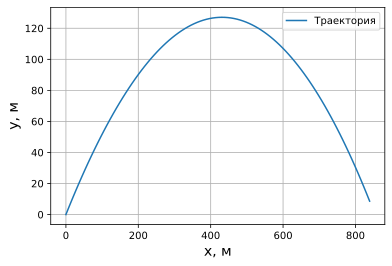

In [9]:
xs = y[:,0]
ys = y[:,1]
plt.plot(xs, ys, label='Траектория');
plt.grid() # сетка
plt.xlabel('x, м', fontsize=14)
plt.ylabel('y, м', fontsize=14)
plt.legend(loc='best');

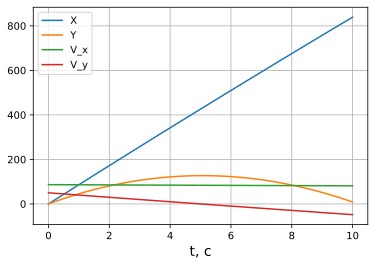

In [10]:
ts = t
xs = y[:,0]
ys = y[:,1]
Vxs = y[:,2]
Vys = y[:,3]
plt.plot(ts, xs, label='X');
plt.plot(ts, ys, label='Y');
plt.plot(ts, Vxs, label='V_x');
plt.plot(ts, Vys, label='V_y');
plt.grid() # сетка
plt.xlabel('t, c', fontsize=14)
plt.legend(loc='best');